<a href="https://colab.research.google.com/github/HarshJ23/NLP-from-scratch-implementations/blob/main/Neural_Network_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

<ipython-input-1-a34149b47052>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
X, y = make_moons(n_samples=5000, random_state=42, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [3]:
X[0:5]


array([[-0.1196884 ,  1.03684845],
       [ 0.03370055,  0.2493631 ],
       [ 0.03864294,  0.33033539],
       [ 0.22222051,  1.03355193],
       [ 0.74448612,  0.69288687]])

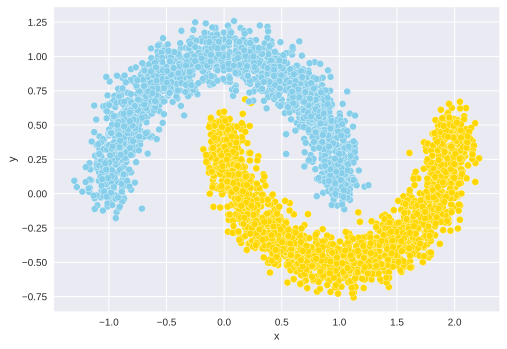

In [4]:
# to plot genetated data points
def plot(data, label):
    fig = plt.figure()
    ax = fig.add_subplot(111, xlabel="x", ylabel="y")
    for i, point in enumerate(data):
        if label[i] == 0:
            ax.scatter(point[0], point[1], color='skyblue', edgecolors='white')
        else:
            ax.scatter(point[0], point[1], color='gold', edgecolors='white')
    plt.show()


plot(X_train, y_train)


In [16]:
# one-hot encoding
def one_hot_encode(labels):
    result = []
    for label in labels:
        if label:
            result.append([0, 1])
        else:
            result.append([1, 0])
    return np.array(result)
    # print(result)

# return first 5 elements of y-train array
print(y_train[:5])

# prints  one-hot encodings of y_train[:5]
one_hot_encode(y_train[:5])


# print(y_train[:5])
# print(result)

# labels of our dataset are 0's and 1's

[0 1 0 1 0]


array([[1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0]])

## Activation Functions



#### 1) SoftMax

In [21]:
# def simple_softmax(x):
#   exp = np.exp(x)
#   return exp / exp.sum()
  # can handle only single input array
  # addition or subtraction in exponent creates no difference.
# simple_softmax([1, 2, 3])

def softmax(x):
    result = []
    for instance in x:
        exp = np.exp(instance - np.max(instance))
        result.append(exp / exp.sum())
    return np.array(result)

softmax([[1 , 2 , 3], [1, 4 , 5]])


array([[0.09003057, 0.24472847, 0.66524096],
       [0.01321289, 0.26538793, 0.72139918]])

####2) ReLU

\text{ReLU}(x) =
\begin{cases}
x & \text{if } x \geq 0 \\
0 & \text{if } x < 0
\end{cases}


In [5]:
def relu(x):
    x[x < 0] = 0
    return x

## Model Initialisation

In [5]:
def init_network(n_features=2, n_class=2, n_hidden=64):
    model = {
        'W1': np.random.randn(n_features, n_hidden),
        'b1': np.random.randn(n_hidden),
        'W2': np.random.randn(n_hidden, n_class),
        'b2': np.random.randn(n_class)
    }
    return model